In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
data = r'/content/drive/MyDrive/rephrasing/df_checked.csv'
df = pd.read_csv(data)
output_path = r'/content/drive/MyDrive/rephrasing/new_plots/hist/'


## Preprocessing

In [ ]:
score_h = ['sens_or_human1', 'sens_reph_human1', 'info_or_human1', 'info_reph_human1','detection', 'comments']

In [ ]:
df.sort_values(by='review_id', inplace=True)

## Internal consistency of human evaluation

In [ ]:
from scipy.interpolate import make_interp_spline

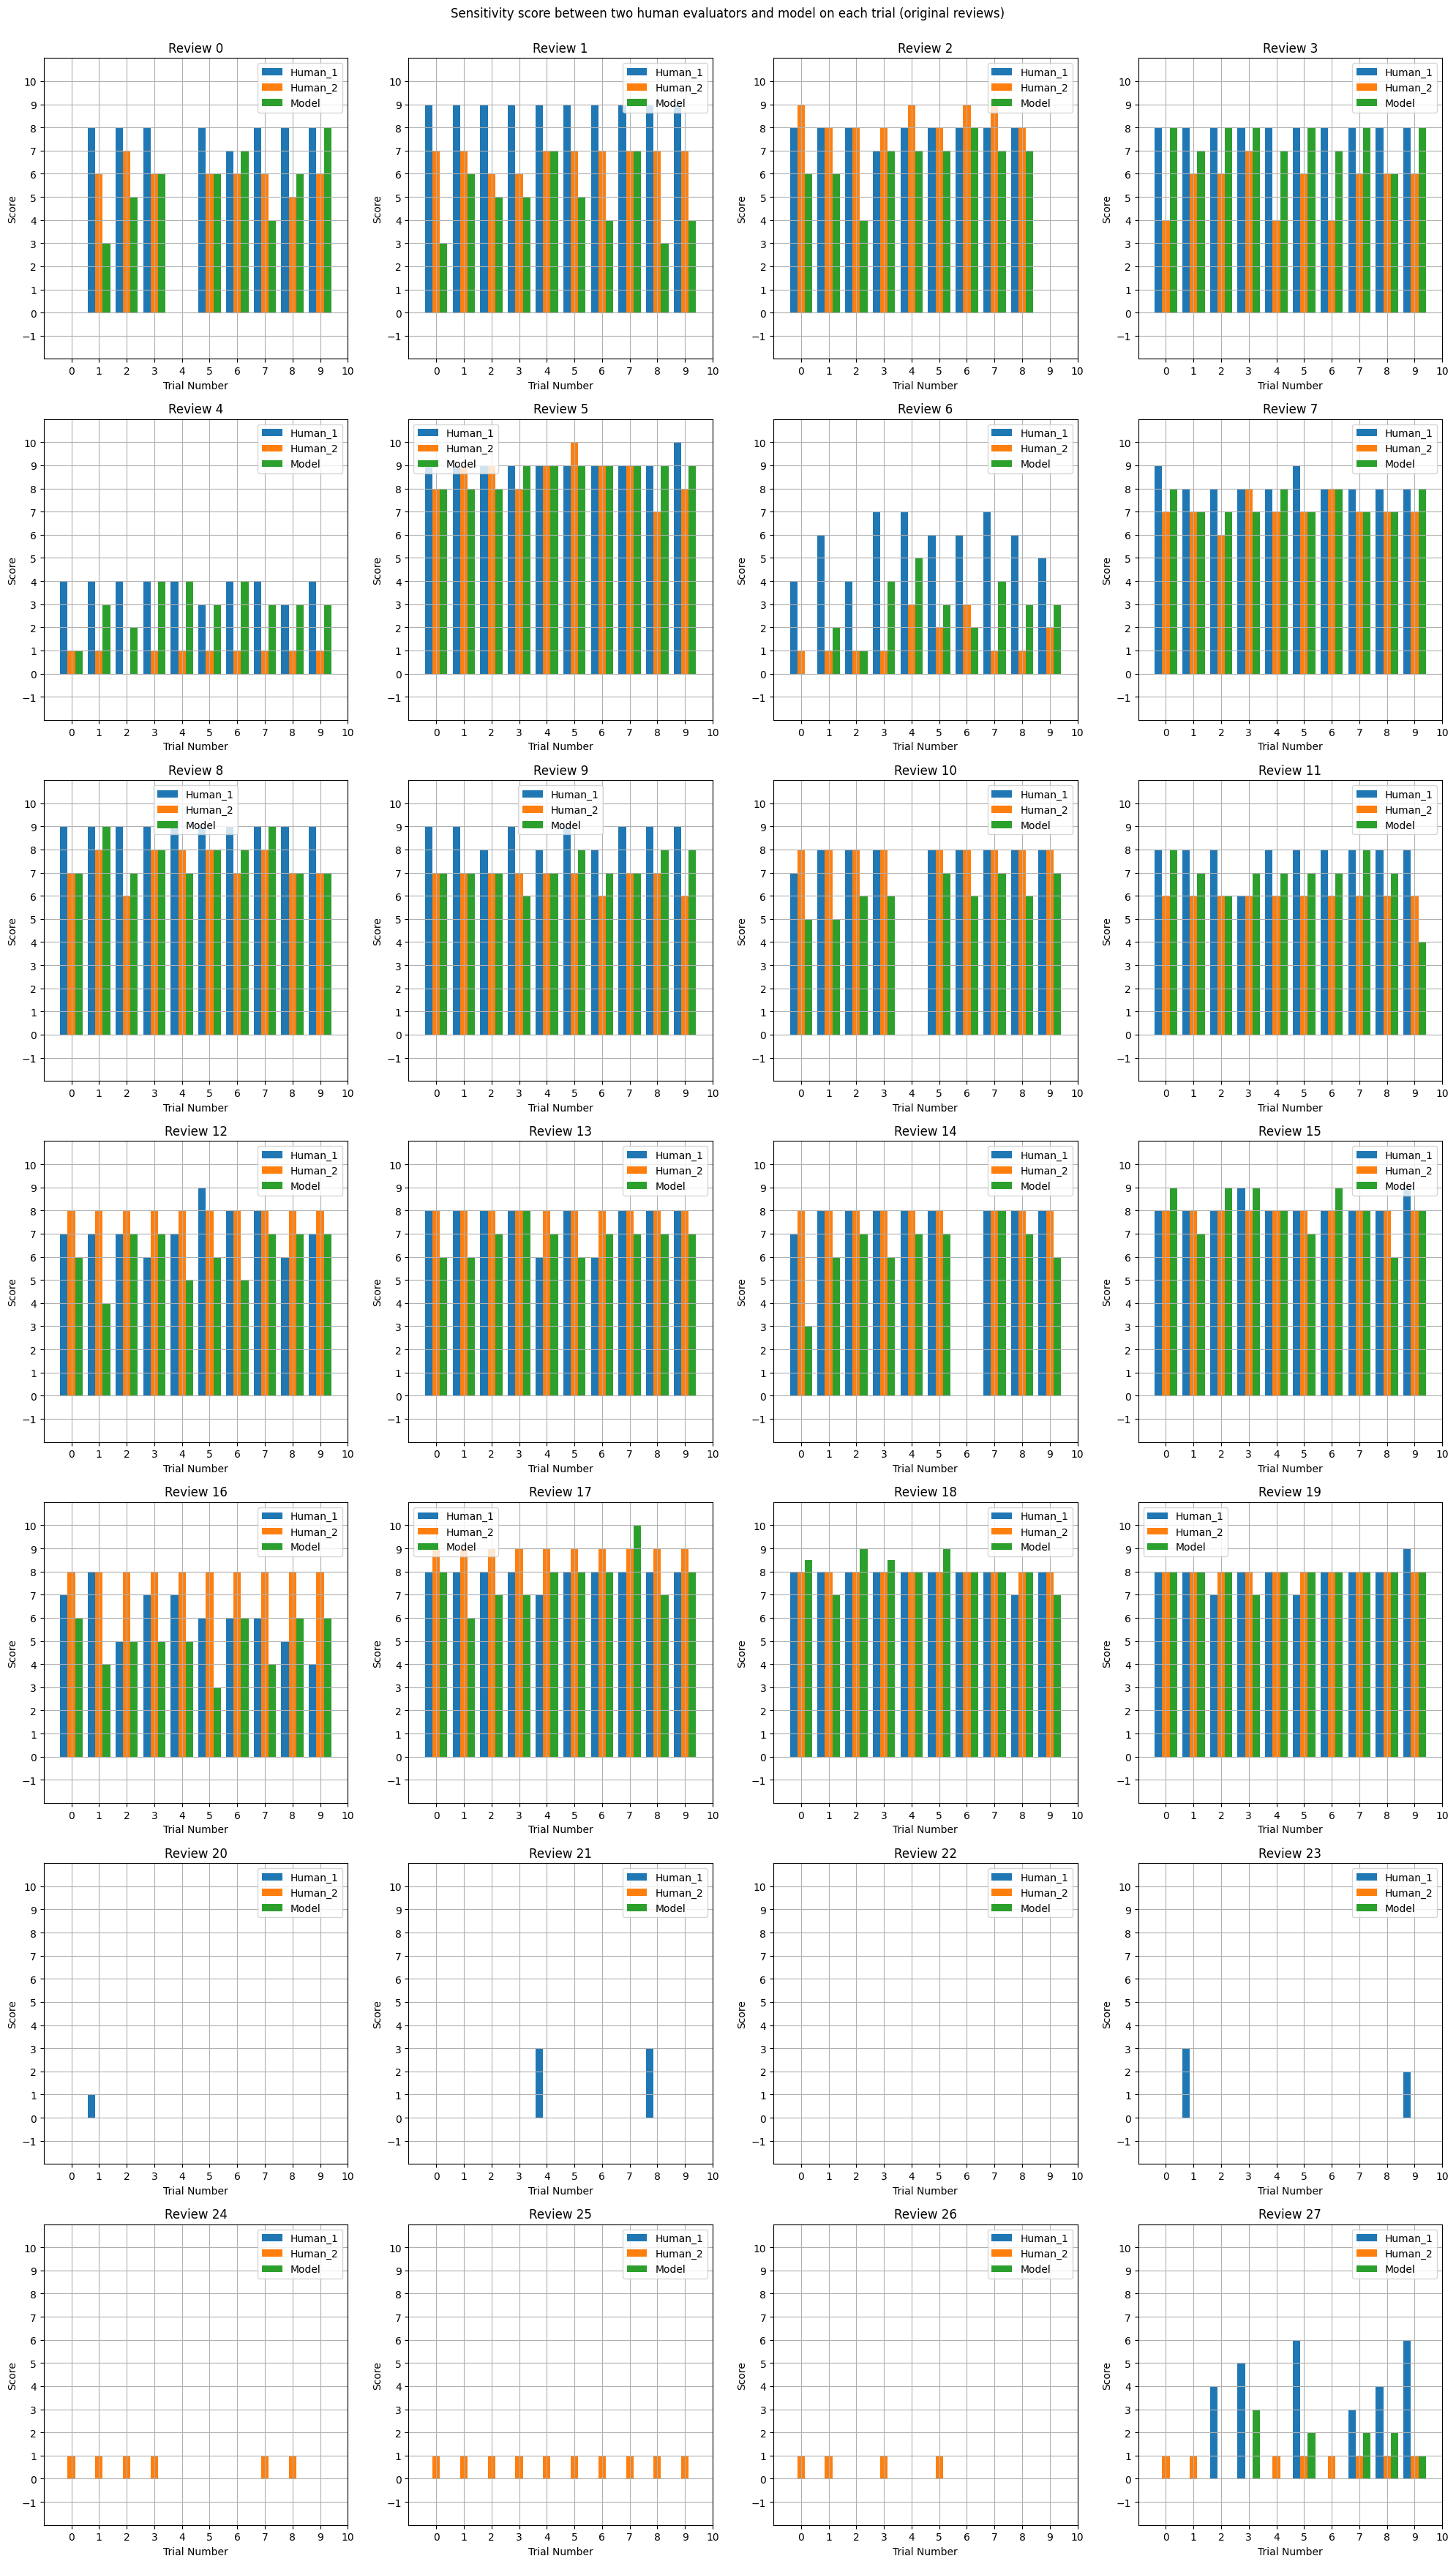

In [ ]:
########### ORIGINAL SENS SCORE 
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'sens_reph_human2', 'sens_or_human2', 'trial_no', 'sens_reph_human1', 'sens_or_human1']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']
    human1_sens_orig_scores = df_plt['sens_or_human1']
    human2_sens_orig_scores = df_plt['sens_or_human2']
    model_sens_orig_scores = df_plt['sens_orig']

    # Highlight values equals to be -1, meaning either missing or not applicable
    # These are not applicable to sensitivity score for original reviews though
    highlighted_indices_human1 = human1_sens_orig_scores[human1_sens_orig_scores == -1].index
    highlighted_indices_human2 = human2_sens_orig_scores[human2_sens_orig_scores == -1].index

    # Plot scatter points
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.bar(trial_numbers-0.27, human1_sens_orig_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, human2_sens_orig_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_sens_orig_scores, label='Model', width=0.27)

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

    # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))
    #break

fig.suptitle('Sensitivity score between two human evaluators and model on each trial (original reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_sens_or.png')
plt.show()

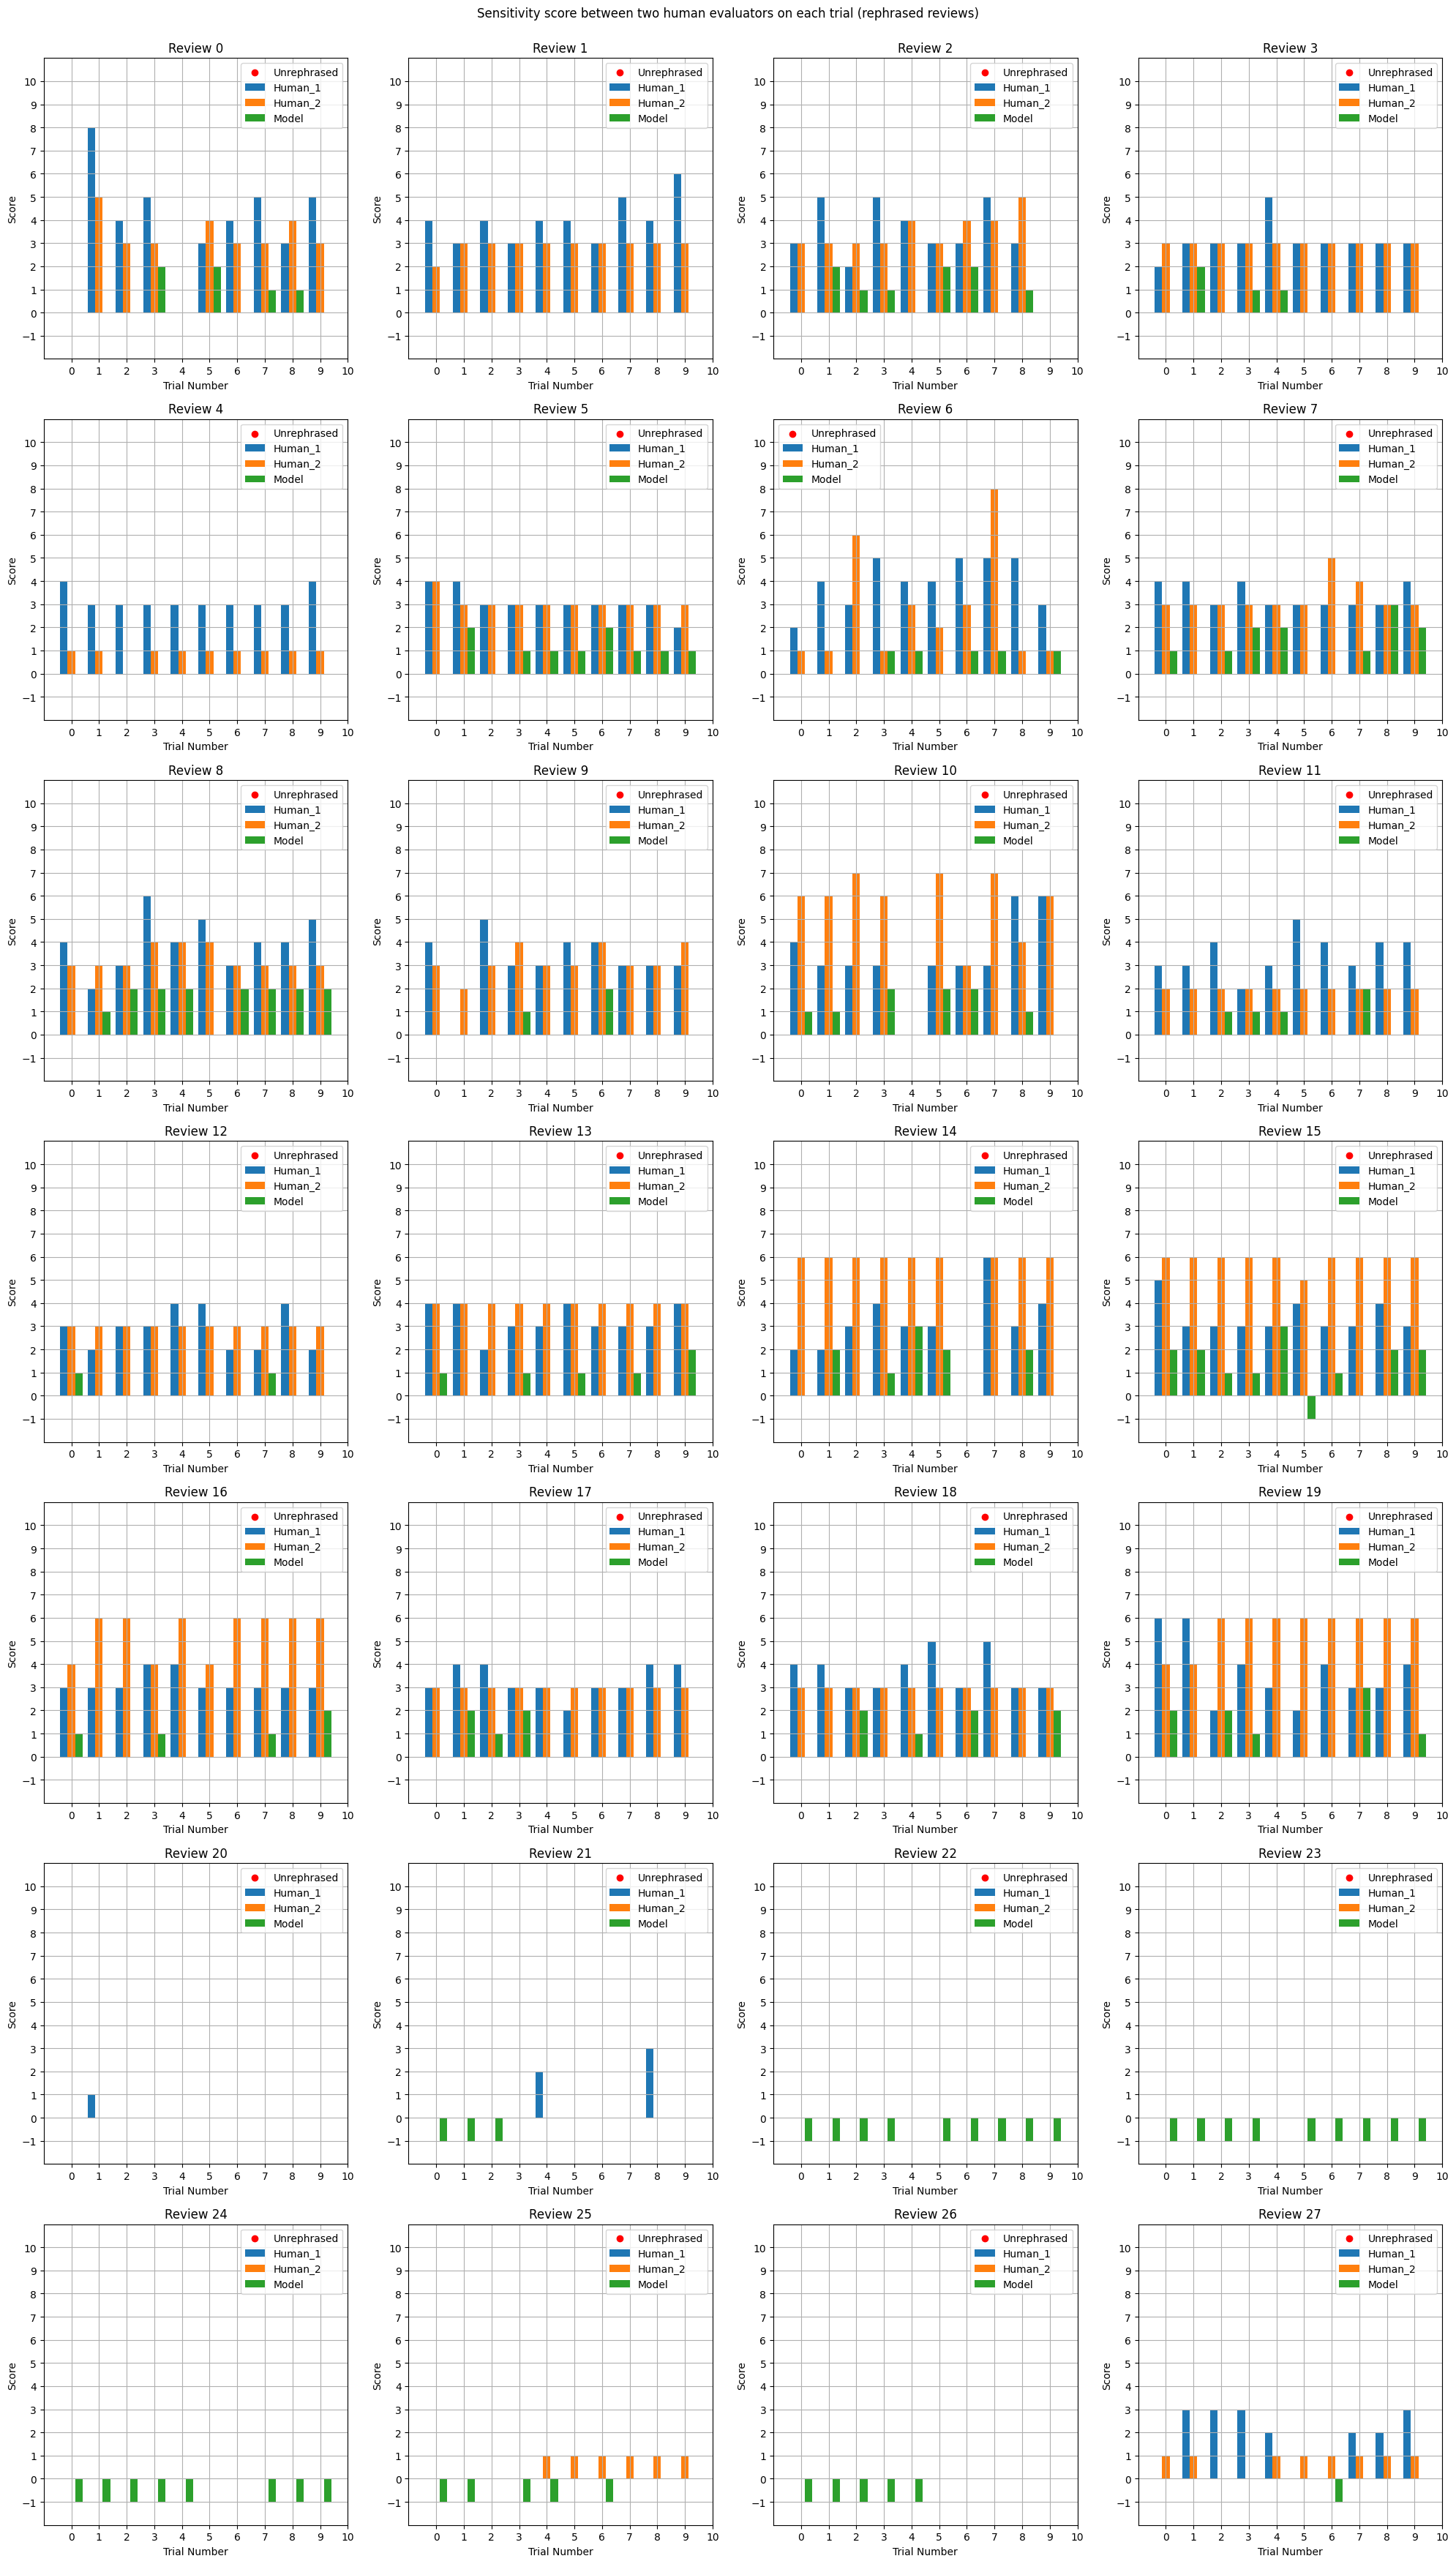

In [ ]:
########### REPHRASED SENS SCORE 
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'sens_reph_human2', 'sens_or_human2', 'trial_no', 'sens_reph_human1']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()

    human1_sens_reph_scores = df_plt['sens_reph_human1']
    human2_sens_reph_scores = df_plt['sens_reph_human2']
    model_sens_reph_scores = df_plt['sens_reph']

    # Highlight values equal to -1
    highlighted_indices_human1 = human1_sens_reph_scores[human1_sens_reph_scores == -1].index
    highlighted_indices_human2 = human2_sens_reph_scores[human2_sens_reph_scores == -1].index

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.bar(trial_numbers-0.27, human1_sens_reph_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, human2_sens_reph_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_sens_reph_scores, label='Model', width=0.27)

    #ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Model score')
    ax.scatter(trial_numbers[highlighted_indices_human1], human1_sens_reph_scores[highlighted_indices_human1], marker='o', color='red', label='Unrephrased')
    ax.scatter(trial_numbers[highlighted_indices_human2], human2_sens_reph_scores[highlighted_indices_human2], marker='o', color='red')

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

      # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))

fig.suptitle('Sensitivity score between two human evaluators on each trial (rephrased reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_sens_reph.png')
plt.show()

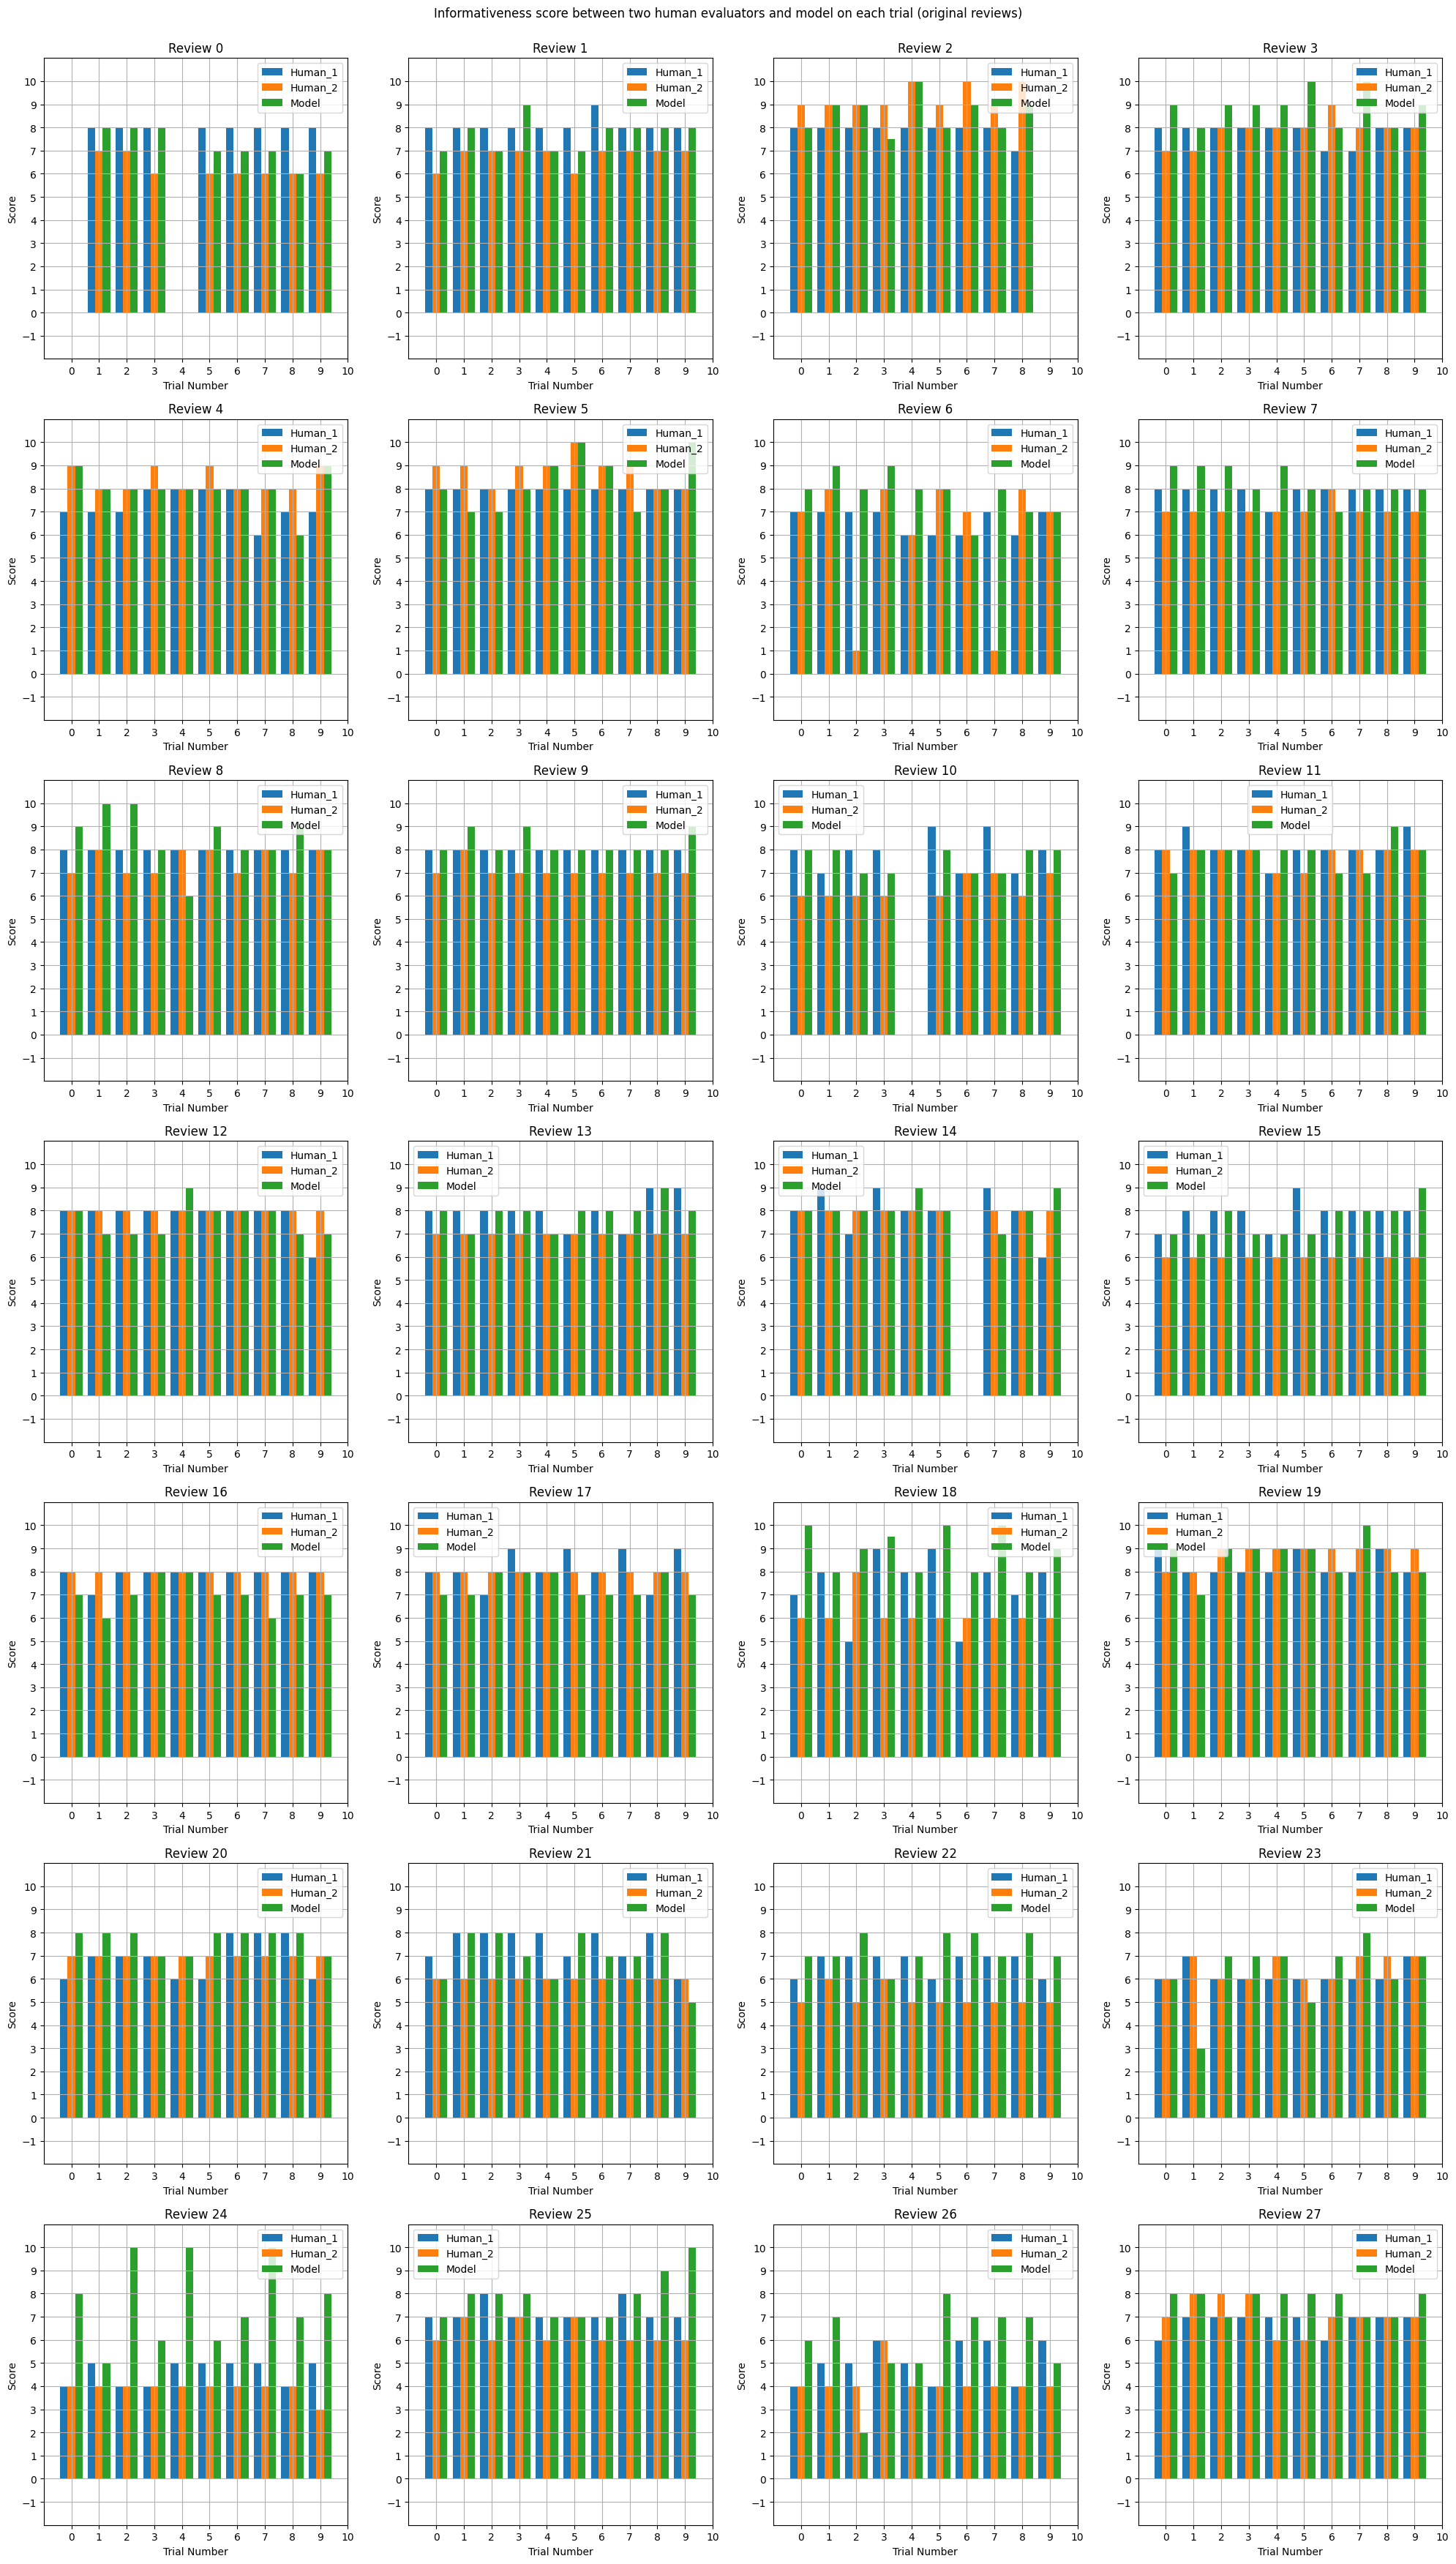

In [ ]:
########### ORIGINAL INFORM SCORE 
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'info_orig', 'info_reph','sens_reph_human2', 'sens_or_human2', 'trial_no', 'sens_reph_human1', 'sens_or_human1', 'info_or_human1', 'info_or_human2']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']
    human1_info_orig_scores = df_plt['info_or_human1']
    human2_info_orig_scores = df_plt['info_or_human2']
    model_info_orig_scores = df_plt['info_orig']

    # Plot scatter points
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.bar(trial_numbers-0.27, human1_info_orig_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, human2_info_orig_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_info_orig_scores, label='Model', width=0.27)

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

    # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))

fig.suptitle('Informativeness score between two human evaluators and model on each trial (original reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_info_or.png')
plt.show()

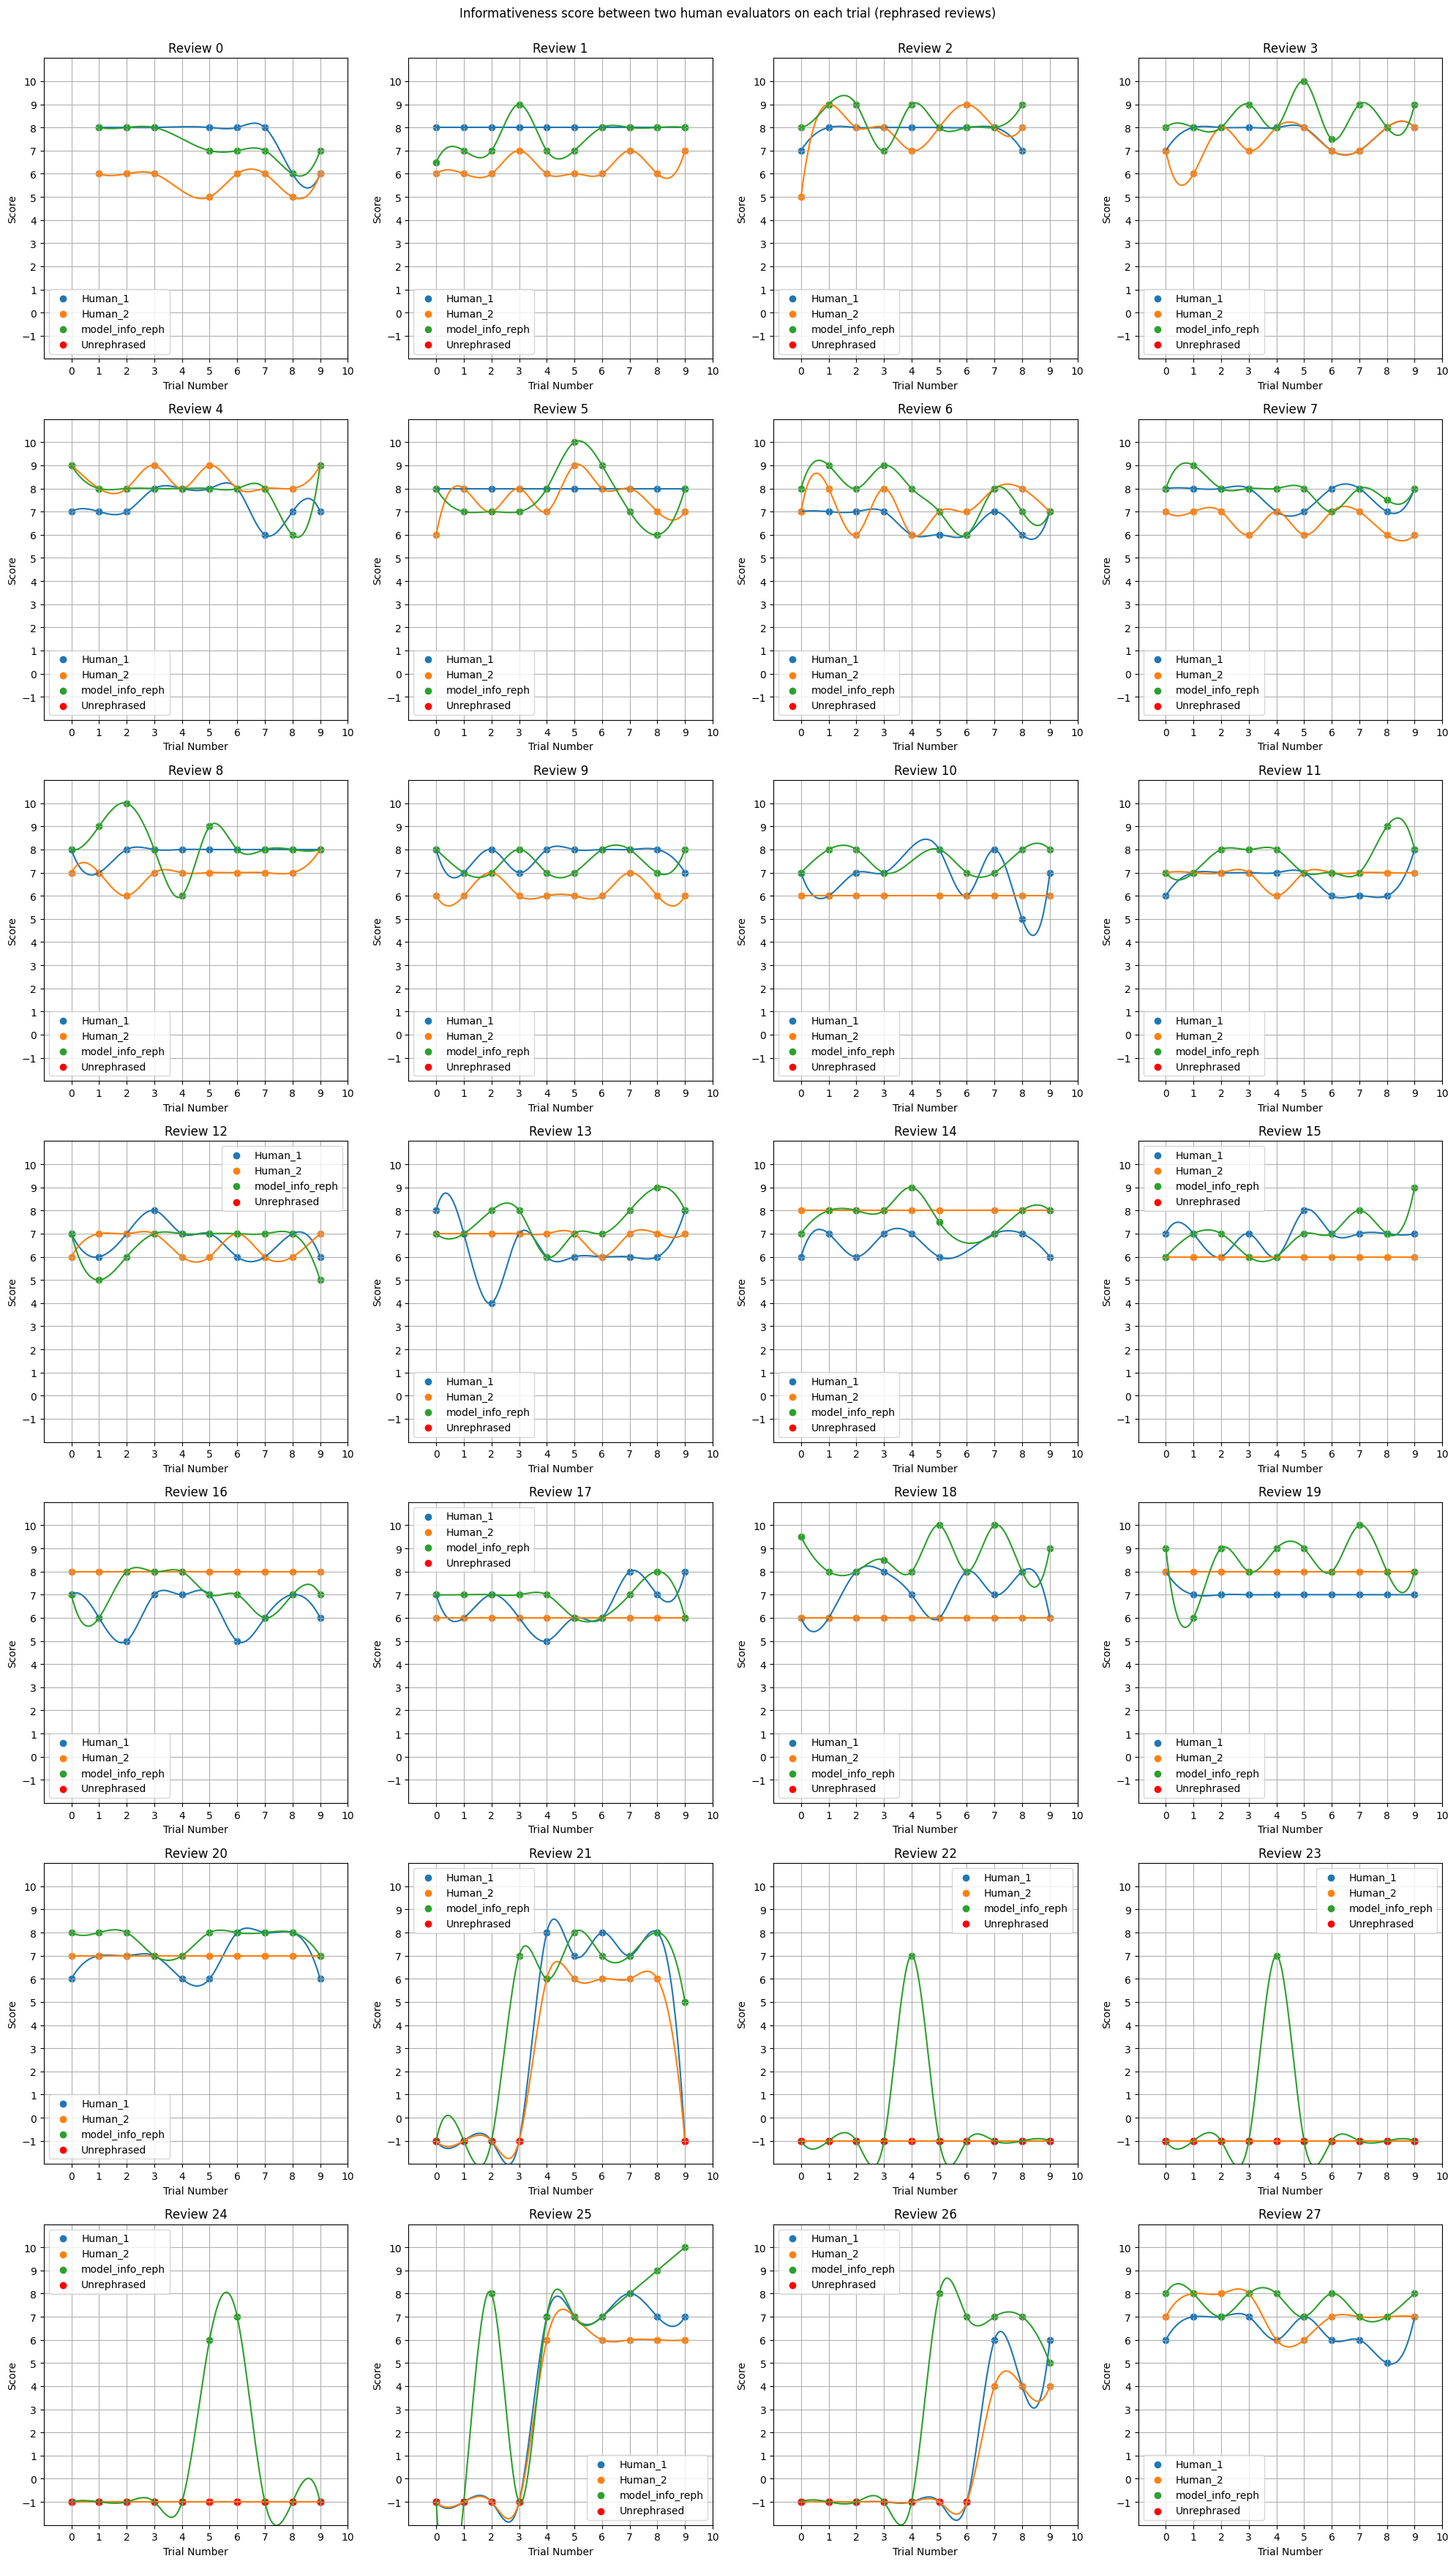

In [ ]:
########### REPHRASED INFORM SCORE 
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'info_orig', 'info_reph','sens_reph_human2', 'sens_or_human2', 'trial_no', 'sens_reph_human1', 'sens_or_human1', 'info_or_human1', 'info_or_human2', 'info_reph_human1', 'info_reph_human2']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()

    human1_info_reph_scores = df_plt['info_reph_human1']
    human2_info_reph_scores = df_plt['info_reph_human2']
    model_info_reph_scores = df_plt['info_reph']

    # Highlight missing values and values equal to -1
    highlighted_indices_reph = human1_info_reph_scores[human1_info_reph_scores == -1].index
    highlighted_indices_orig = human2_info_reph_scores[human2_info_reph_scores == -1].index

    # Plot scatter points
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.scatter(trial_numbers, human1_info_reph_scores, marker='o', label='Human_1')
    ax.scatter(trial_numbers, human2_info_reph_scores, marker='o', label='Human_2')
    ax.scatter(trial_numbers, model_info_reph_scores, marker='o', label='model_info_reph')

    #ax.scatter(trial_numbers, human2_info_reph_scores, marker='o', label='Model score')
    ax.scatter(trial_numbers[highlighted_indices_reph], human1_info_reph_scores[highlighted_indices_reph], marker='o', color='red', label='Unrephrased')
    ax.scatter(trial_numbers[highlighted_indices_orig], human2_info_reph_scores[highlighted_indices_orig], marker='o', color='red')

    # Interpolate curve
    x_new = np.linspace(trial_numbers.min(), trial_numbers.max(), 300)
    spl_reph = make_interp_spline(trial_numbers, human1_info_reph_scores, k=3)
    spl_orig = make_interp_spline(trial_numbers, human2_info_reph_scores, k=3)
    spl_model = make_interp_spline(trial_numbers, model_info_reph_scores, k=3)
    y_smooth_reph = spl_reph(x_new)
    y_smooth_orig = spl_orig(x_new)
    y_smooth_model = spl_model(x_new)

    # Plot curve
    ax.plot(x_new, y_smooth_reph)#, label='sens_reph curve', color='blue')
    ax.plot(x_new, y_smooth_orig)#, label='sens_reph_h curve', color='orange')
    ax.plot(x_new, y_smooth_model)

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

      # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))


fig.suptitle('Informativeness score between two human evaluators on each trial (rephrased reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_info_reph.png')
plt.show()